In [13]:
class LogisticR:  
    def __init__(self):
        self.lr=0.01
        self.iter=100
        self.w=[0,0]
        self.b=0
        self.c=0
        self.m=0
    def fit(self,data,label):
        self.data=np.array(data)
        self.label=np.array(label)
        for i in range(self.iter):
            for j in range(len(self.data)):
                p1=((self.w[0]*self.data[j][0])+(self.w[1]*self.data[j][1])+self.b)
                s=(1/(1+pow(2.718,-p1)))
                e=(label[j]-s)
                self.w[0]+=(self.data[j][0]*self.lr*e)
                self.w[1]+=(self.data[j][1]*self.lr*e)
                self.b+=(e*0.01)

        self.m=-(self.w[0]/self.w[1])
        self.c=-(self.b/self.w[1])
    def predict(self,test_data,test_label):
        l=[]
        for j in range(len(test_data)):
            p1=((self.w[0]*test_data[j][0])+(self.w[1]*test_data[j][1])+self.b)  
            if p1>=0:
                    l.append(1)
            else:
                    l.append(0)
        return l
    def displaydata(self):
        max1=np.amax(self.data[:,0])
        min1=np.amin(self.data[:,0])
        ymax=np.amax(self.data[:,1])
        ymin=np.amin(self.data[:,1])
        fig, ax = plt.subplots()
        ax.plot([min1,max1],[(self.m*(min1)+self.c),(self.m*(max1)+self.c)],color="red")
        ax.set_ylim([ymin-1,ymax+1])
        scatter = ax.scatter(self.data[:,0],self.data[:,1],c=self.label)
        # produce a legend with the unique colors from the scatter
        legend1 = ax.legend(*scatter.legend_elements(),
                            loc="lower left", title="Classes")
        ax.add_artist(legend1)
    def score(self,pred,y_test):
        count=0
        for i in range(len(pred)):
            if pred[i]==y_test[i]:
                    count+=1
        return count/len(pred)
        

In [25]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.datasets.samples_generator import make_blobs
#we will select 40 points with 2 centers(groups) and each group has 20 points
#data,label=make_blobs(n_samples=100,centers=2,random_state=20)
data, label = make_classification(
    n_features=2,
    n_classes=2,
    n_samples=200,
    n_redundant=0,
    n_clusters_per_class=1
)
x_train,x_test,y_train,y_test=train_test_split(data,label,test_size=0.20,random_state=2)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)


(160, 2)
(40, 2)
(160,)
(40,)


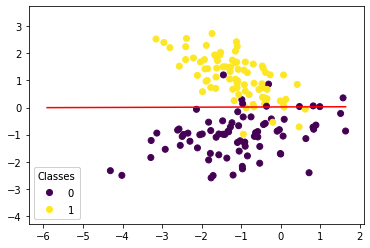

In [26]:
p=LogisticR()
p.fit(x_train,y_train)
p.displaydata()
#plt.scatter(x_test[:,0],x_test[:,1])

In [27]:
predictions=p.predict(x_test,y_test)
print("Actual Labels of Test Data   :",y_test)
print("\nPredicted_Labels of Test Data:",np.array(predictions))
score=p.score(predictions,y_test)
print("\nAccuracy_Score:",score)

Actual Labels of Test Data   : [0 1 0 0 1 1 0 1 1 1 0 0 0 0 1 0 1 0 0 1 0 0 0 0 0 0 0 1 1 1 0 1 1 1 1 0 0
 1 1 0]

Predicted_Labels of Test Data: [0 1 0 0 1 1 0 1 1 1 1 0 0 0 1 0 1 0 1 1 0 0 0 0 0 0 0 1 1 1 0 1 1 1 0 0 0
 1 1 0]

Accuracy_Score: 0.925


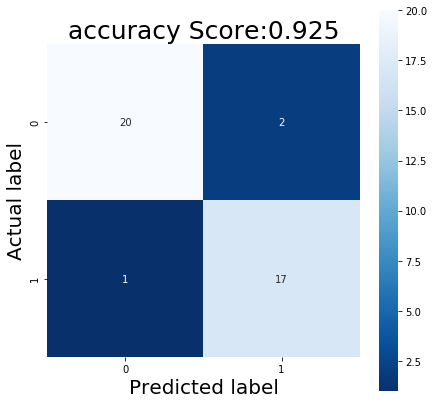

In [28]:
import seaborn as sns
from sklearn import metrics
cm=metrics.confusion_matrix(y_test,predictions)
#Displying confussion matrix in heat map
plt.figure(figsize=(7,7))
sns.heatmap(cm,annot=True,fmt=".0f",square=True,cmap='Blues_r');
plt.ylabel('Actual label',size=20);
plt.xlabel('Predicted label',size=20);
all_sample_title='accuracy Score:{0}'.format(score)
plt.title(all_sample_title,size=25);
